In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow import math
from keras.utils.vis_utils import plot_model

if(tf.config.list_physical_devices('GPU')):
    print("Yes")

c:\Users\KSpicer\Anaconda3\envs\victorian_authorship_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
nba_data = pd.read_csv('nba_salary_stats.csv')
nba_data.head()

,first_name,last_name,team,salary,pos,age,g,gs,mp,fg,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,Precious,Achiuwa,TOR,2711280.0,C,22,73,28,1725,265,...,0.595,146,327,473,82,37,41,84,151,664
1,Bam,Adebayo,MIA,28103550.0,C,24,56,56,1825,406,...,0.753,137,427,564,190,80,44,148,171,1068
2,LaMarcus,Aldridge,BRK,2641691.0,C,36,47,12,1050,252,...,0.873,73,185,258,42,14,47,44,78,607
3,Grayson,Allen,MIL,4054695.0,SG,26,66,61,1805,255,...,0.865,32,190,222,100,46,18,43,96,733
4,Jarrett,Allen,CLE,20000000.0,C,23,56,56,1809,369,...,0.708,192,410,602,92,44,75,94,97,904


In [4]:
nba_data.isna().sum()
nba_data = nba_data.dropna()

In [5]:
nba_data_numeric = nba_data.copy()
del nba_data_numeric['first_name']
del nba_data_numeric['last_name']
del nba_data_numeric['team']
del nba_data_numeric['pos']
nba_data_numeric.head()

,salary,age,g,gs,mp,fg,fga,fg%,3p,3pa,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,2711280.0,22,73,28,1725,265,603,0.439,56,156,...,0.595,146,327,473,82,37,41,84,151,664
1,28103550.0,24,56,56,1825,406,729,0.557,0,6,...,0.753,137,427,564,190,80,44,148,171,1068
2,2641691.0,36,47,12,1050,252,458,0.550,14,46,...,0.873,73,185,258,42,14,47,44,78,607
3,4054695.0,26,66,61,1805,255,569,0.448,159,389,...,0.865,32,190,222,100,46,18,43,96,733
4,20000000.0,23,56,56,1809,369,545,0.677,1,10,...,0.708,192,410,602,92,44,75,94,97,904


In [6]:
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

In [7]:
nba_data_numeric['salary'] = nba_data_numeric['salary'].apply(clean_currency).astype('float')

In [8]:
print(np.shape(nba_data_numeric))
print(nba_data_numeric.describe())

(289, 27)
             salary         age           g          gs           mp  \
count  2.890000e+02  289.000000  289.000000  289.000000   289.000000   
mean   8.972877e+06   25.768166   56.619377   30.415225  1373.657439   
std    1.008679e+07    4.378557   18.081042   26.947104   698.833132   
min    5.318000e+03   19.000000    9.000000    0.000000    35.000000   
25%    2.033160e+06   22.000000   47.000000    5.000000   799.000000   
50%    4.259259e+06   25.000000   62.000000   21.000000  1406.000000   
75%    1.242000e+07   29.000000   70.000000   57.000000  1931.000000   
max    4.578097e+07   38.000000   82.000000   80.000000  2743.000000   

               fg          fga         fg%          3p         3pa  ...  \
count  289.000000   289.000000  289.000000  289.000000  289.000000  ...   
mean   237.546713   514.283737    0.458730   74.276817  208.335640  ...   
std    164.543135   347.674340    0.072096   63.139612  166.382283  ...   
min      3.000000    13.000000    0.23100

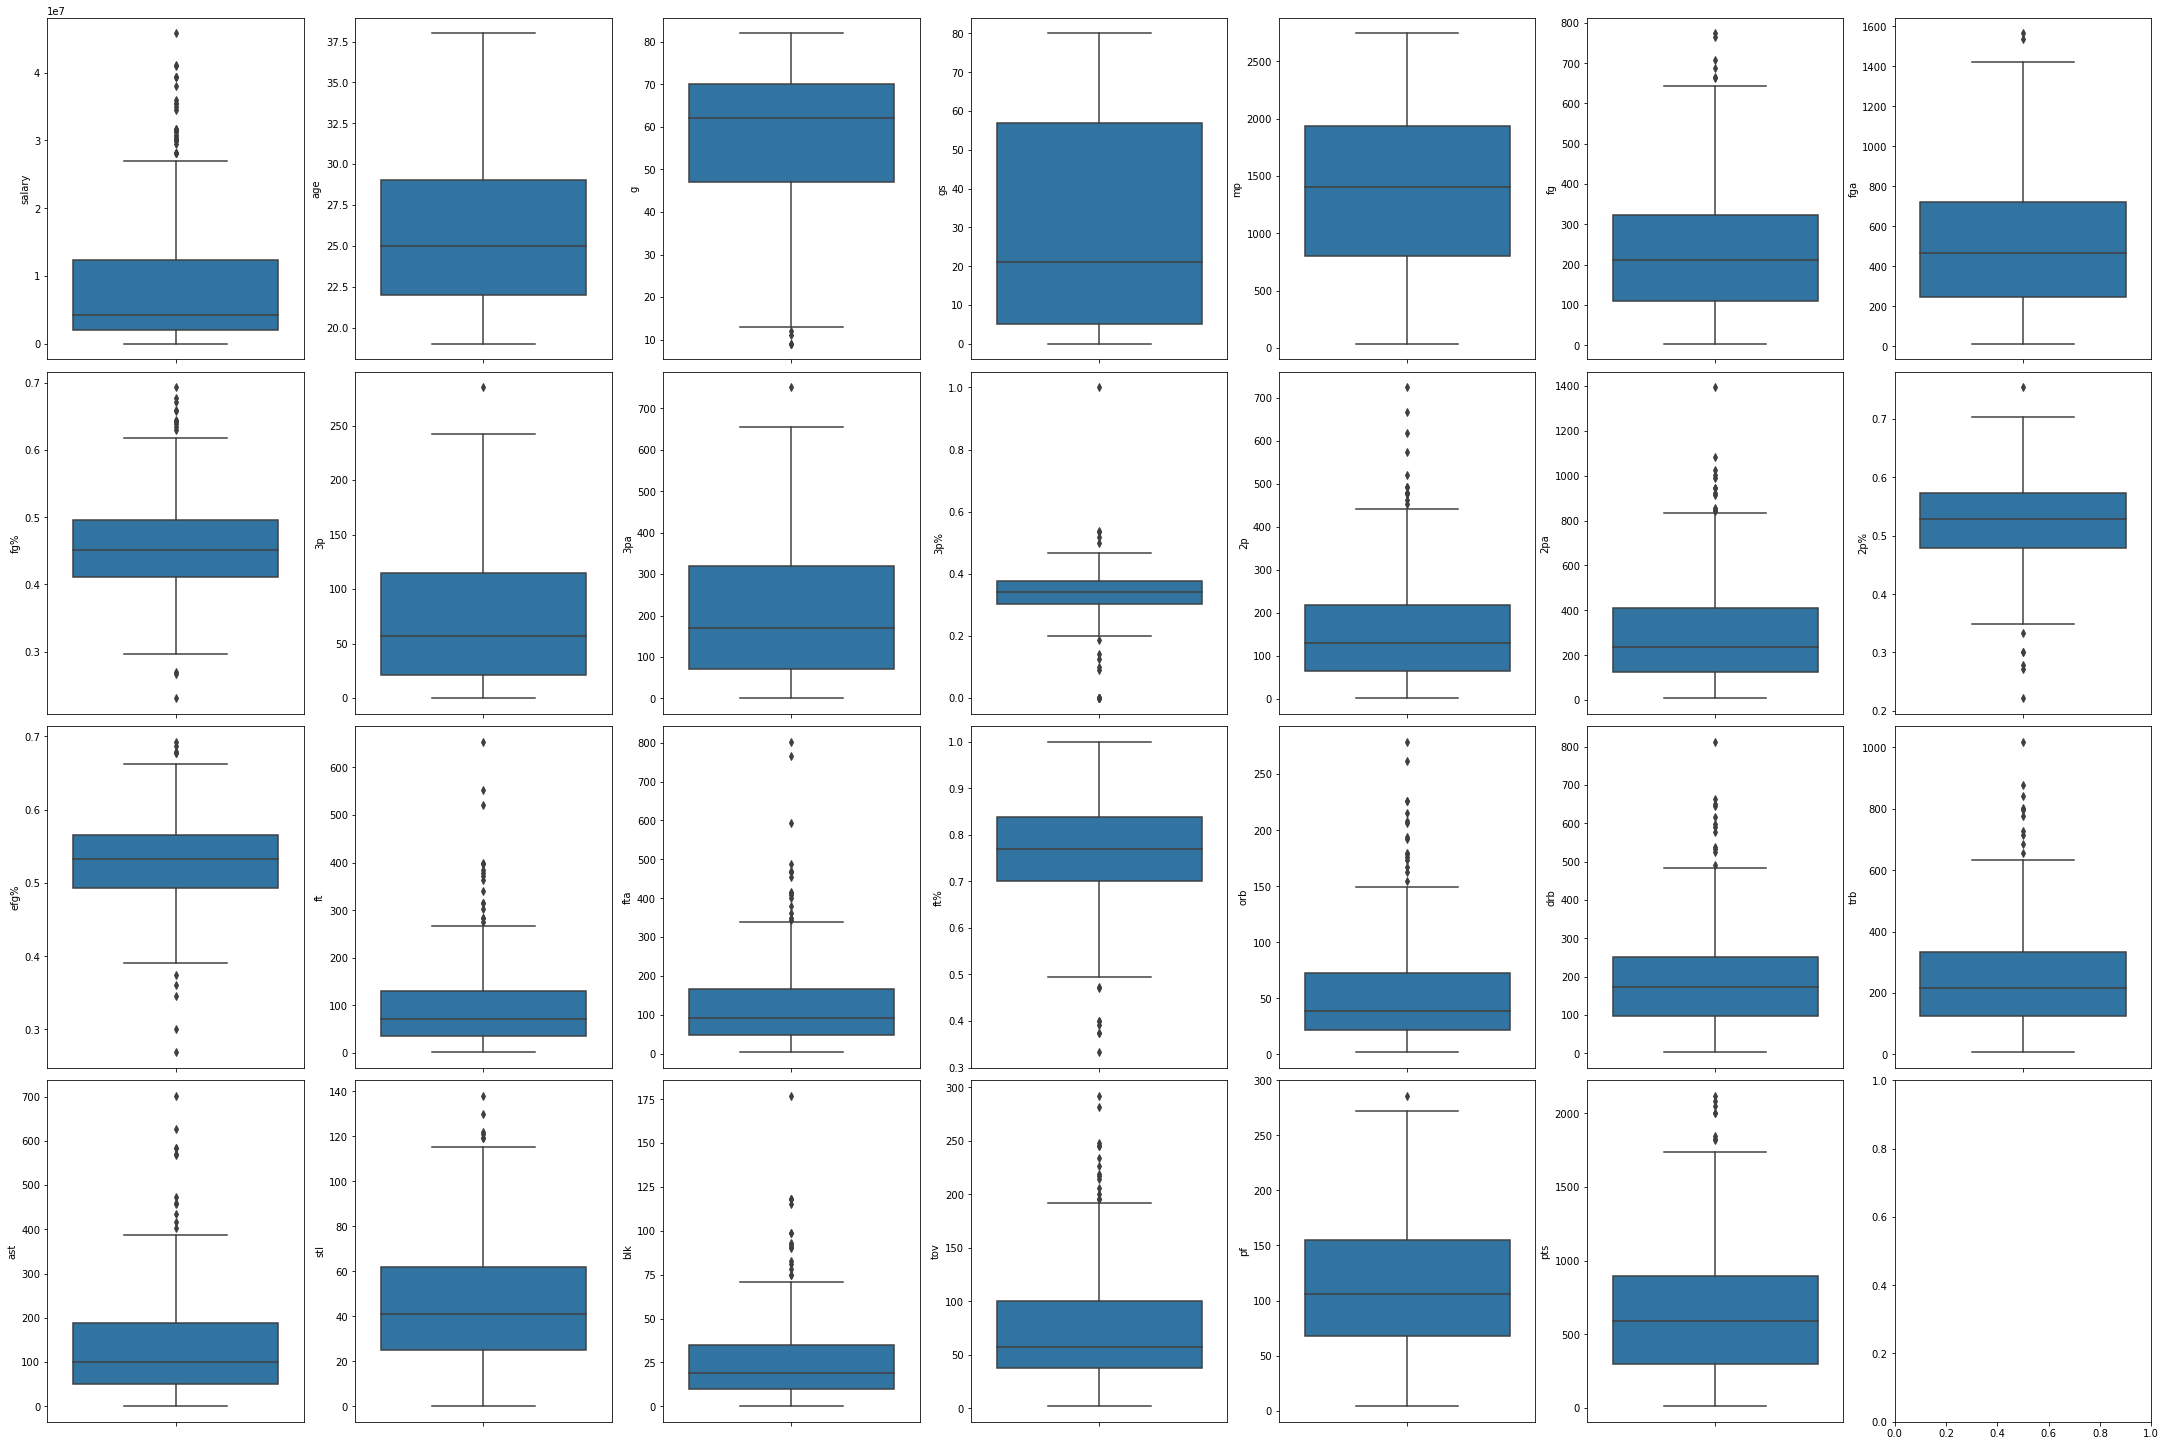

In [9]:
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k, v in nba_data_numeric.items():
    sns.boxplot(y=k, data=nba_data_numeric, ax=axs[index])
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)

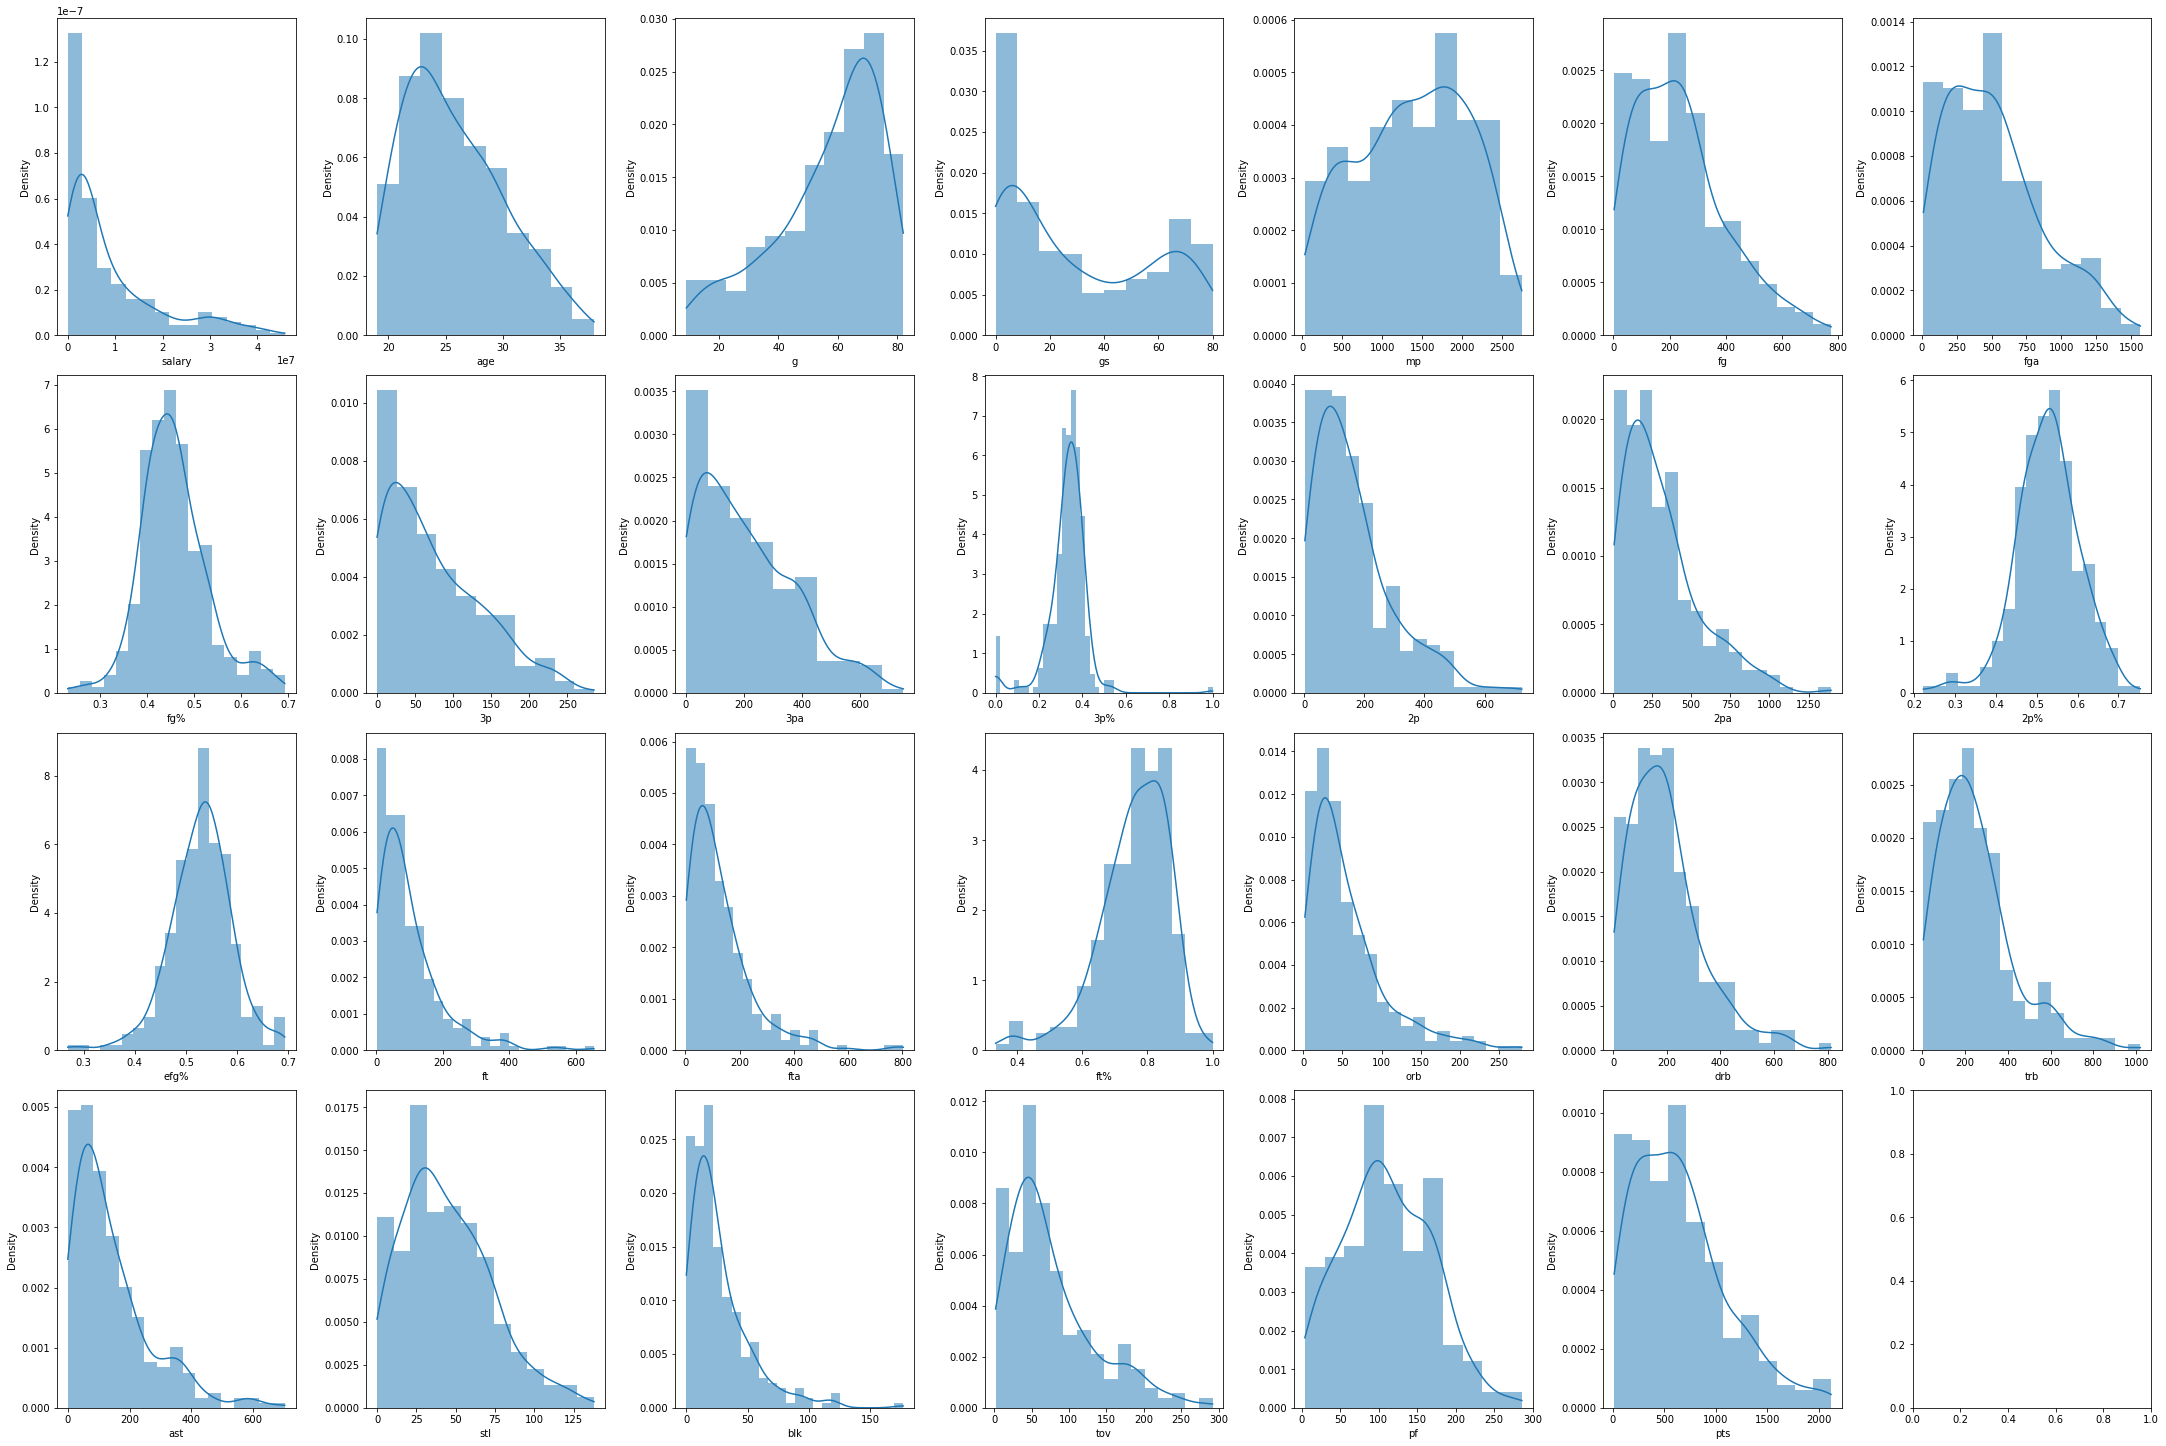

In [10]:
fig, axs = plt.subplots(ncols=7, nrows=4, figsize=(30, 20))
index = 0
axs = axs.flatten()
for k, v in nba_data_numeric.items():
    sns.histplot(v, ax=axs[index], kde=True, stat='density', linewidth=0)
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=0.5)

<AxesSubplot:>

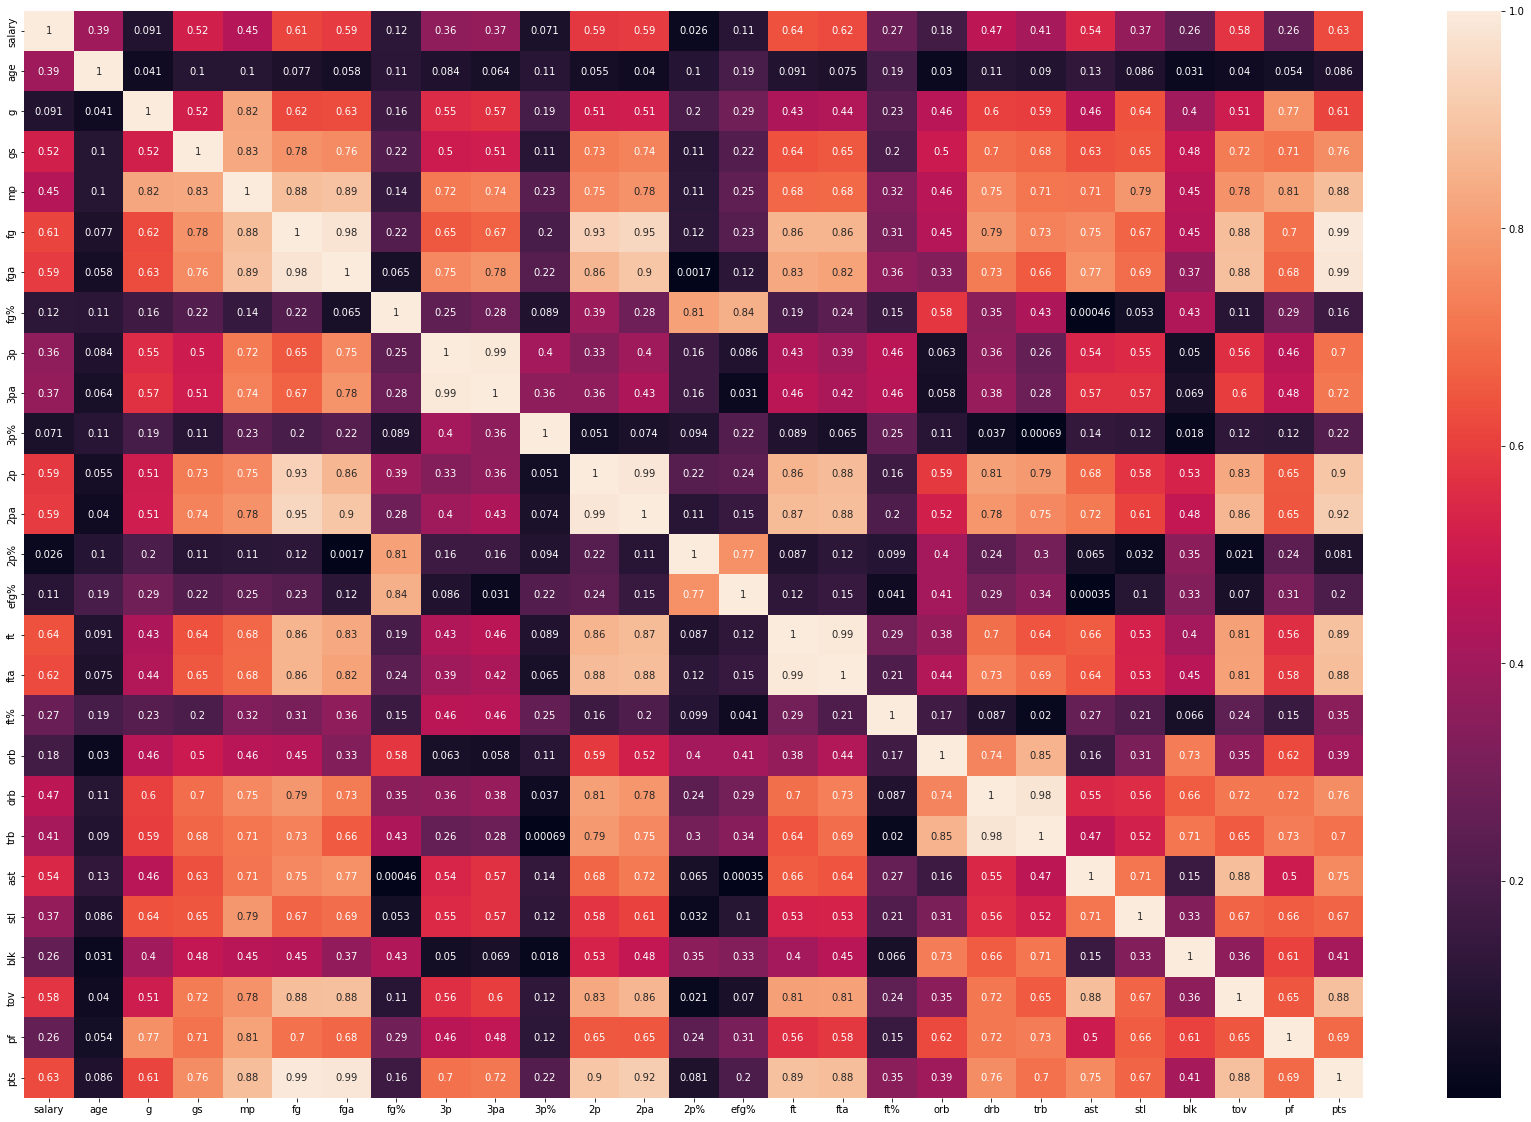

In [11]:
plt.figure(figsize=(30,20))
sns.heatmap(nba_data_numeric.corr().abs(), annot=True)

In [12]:
for k, v in nba_data_numeric.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3-q1
    v_col = v[(v <= q1 - 1.15 * iqr) | (v >= q3 + 1.5 * iqr)] 
    perc = np.shape(v_col)[0] * 100.0 / np.shape(nba_data_numeric)[0]
    print("%s Outliers = %.2f%%" % (k, perc))

salary Outliers = 9.69%
age Outliers = 0.00%
g Outliers = 5.88%
gs Outliers = 0.00%
mp Outliers = 0.00%
fg Outliers = 2.08%
fga Outliers = 0.69%
fg% Outliers = 5.19%
3p Outliers = 0.35%
3pa Outliers = 0.35%
3p% Outliers = 7.96%
2p Outliers = 4.50%
2pa Outliers = 4.15%
2p% Outliers = 2.77%
efg% Outliers = 5.88%
ft Outliers = 5.54%
fta Outliers = 5.54%
ft% Outliers = 4.50%
orb Outliers = 5.54%
drb Outliers = 4.15%
trb Outliers = 3.46%
ast Outliers = 4.15%
stl Outliers = 2.08%
blk Outliers = 5.54%
tov Outliers = 4.84%
pf Outliers = 0.35%
pts Outliers = 2.77%


In [13]:
scalar = tf.constant(5)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [14]:
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10])>

In [15]:
matrix = tf.constant([[1, 2], [3, 4]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

In [16]:
tensor = tf.constant([[[1, 2, 3], 
    [4, 5, 6],
    [7, 8, 9],
    [10, 11, 12], 
    [13, 14, 15],
    [16, 17, 18]]])
tensor

<tf.Tensor: shape=(1, 6, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]])>

In [17]:
v_tensor = tf.Variable([5, 6])
print("Index 0:", v_tensor[0])
v_tensor[0].assign(8)
print("Index 0:", v_tensor[0])

Index 0: tf.Tensor(5, shape=(), dtype=int32)
Index 0: tf.Tensor(8, shape=(), dtype=int32)


In [18]:
rand_tensor = tf.random.Generator.from_seed(66)

In [20]:
tf.random.set_seed(66)
rand_tensor = tf.random.Generator.from_seed(66)

In [21]:
rand_tensor = tf.random.Generator.from_seed(66)
rand_tensor = rand_tensor.normal(shape=(3, 2), mean=0.0, stddev=1.0)
rand_tensor

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.5517507 , -0.3741098 ],
       [-0.28709963,  1.5089895 ],
       [-0.14833727, -1.2846565 ]], dtype=float32)>

In [24]:
np_array = np.arange(1, 25, dtype=np.int32)
np_array

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [26]:
tensor2 = tf.constant(np_array)
tensor2

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])>

In [29]:
tensor3 = tf.constant(np_array, shape=(6, 2, 2))
tensor3

<tf.Tensor: shape=(6, 2, 2), dtype=int32, numpy=
array([[[ 1,  2],
        [ 3,  4]],

       [[ 5,  6],
        [ 7,  8]],

       [[ 9, 10],
        [11, 12]],

       [[13, 14],
        [15, 16]],

       [[17, 18],
        [19, 20]],

       [[21, 22],
        [23, 24]]])>

In [32]:
print("Index 0:", tensor3[:1])
print("Values in Dims:", tensor3.shape)
print("Dimensions:", tensor3.ndim)
print("Total Values:", tf.size(tensor3).numpy())
print("Data Type:", tensor3.dtype)

Index 0: tf.Tensor(
[[[1 2]
  [3 4]]], shape=(1, 2, 2), dtype=int32)
Values in Dims: (6, 2, 2)
Dimensions: 3
Total Values: 24
Data Type: <dtype: 'int32'>


In [34]:
ic_sales = tf.constant([[26, 27, 22, 10, 12, 33],
                        [18, 21, 10, 8, 4, 26],
                        [9, 20, 4, 9, 7, 16],
                        [24, 19, 12, 8, 6, 14]])
ic_sales

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[26, 27, 22, 10, 12, 33],
       [18, 21, 10,  8,  4, 26],
       [ 9, 20,  4,  9,  7, 16],
       [24, 19, 12,  8,  6, 14]])>

In [36]:
ic_price = tf.constant([[3, 2, 4, 4]])
ic_price

<tf.Tensor: shape=(1, 4), dtype=int32, numpy=array([[3, 2, 4, 4]])>

In [38]:
tf.matmul(ic_price, ic_sales)

<tf.Tensor: shape=(1, 6), dtype=int32, numpy=array([[246, 279, 150, 114,  96, 271]])>

In [42]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'pts']),
    (OneHotEncoder(handle_unknown='ignore'), ['pos', 'team'] )
)

In [43]:
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'pts']))

In [75]:
# Using data from the NBA Efficiency Formula:
ct = make_column_transformer(
    (MinMaxScaler(), ['pts', 'trb', 'ast', 'stl', 'blk', 'fg%', 'ft%', 'tov', 'g'])
)

In [86]:
# Use every statistic:

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "g", "gs", "mp", "fg", "fga", "fg%", "3p", "3pa", "3p%", "2p", "2pa", "2p%", "efg%", "ft", "fta", "ft%", "orb", "drb", "trb", "ast", "stl", "blk", "tov", "pf", "pts"]), # Normalize these columns
    (OneHotEncoder(handle_unknown="ignore"), ["team", "pos"]) # One hot encode these columns (pos, team)
)

In [87]:
X = nba_data.drop('salary', axis=1) # Features
y = nba_data['salary'] # Player Salary: Target to Predict

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=66)

In [89]:
ct.fit(X_train)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [90]:
X_train_normal

array([[0.22222222, 0.02739726, 0.1375    , ..., 0.        , 0.        ,
        1.        ],
       [0.44444444, 0.8630137 , 0.9       , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.42465753, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.44444444, 0.89041096, 0.9125    , ..., 0.        , 0.        ,
        0.        ],
       [0.11111111, 0.82191781, 0.05      , ..., 1.        , 0.        ,
        0.        ],
       [0.38888889, 0.68493151, 0.175     , ..., 0.        , 1.        ,
        0.        ]])

In [91]:
tf.random.set_seed(66)

nba_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

nba_model.compile(loss=tf.keras.losses.mae, 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics='mae')

In [92]:
fit_data = nba_model.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [93]:
nba_model_loss, nba_model_mae = nba_model.evaluate(X_test_normal, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 4649421.0000 - mae: 4649421.0000


<AxesSubplot:xlabel='Epoch', ylabel='Loss'>

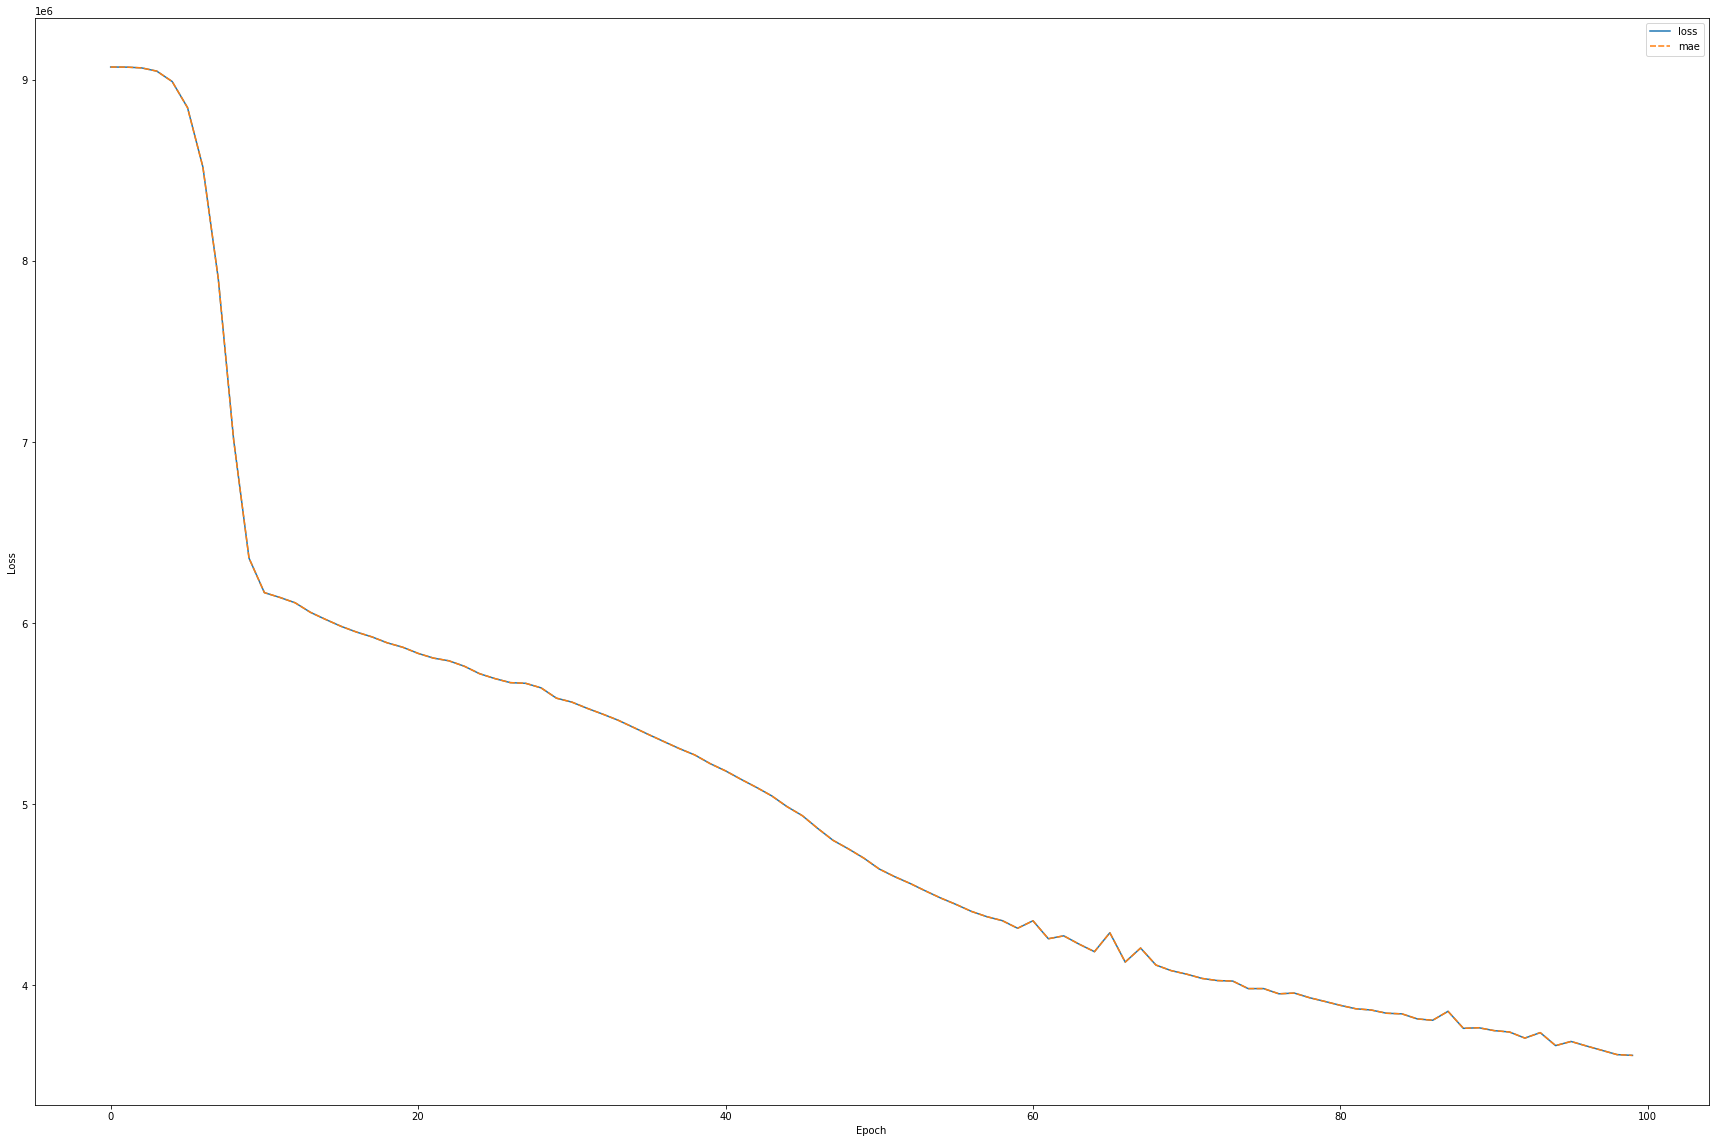

In [94]:
plt.figure(figsize=(30, 20))
plt.ylabel("Loss")
plt.xlabel("Epoch")
sns.lineplot(data=fit_data.history, color='red')

2/2 [==============================] - 0s 2ms/step - loss: 4856055.0000 - mae: 4856055.0000


<AxesSubplot:xlabel='Epoch', ylabel='Loss'>

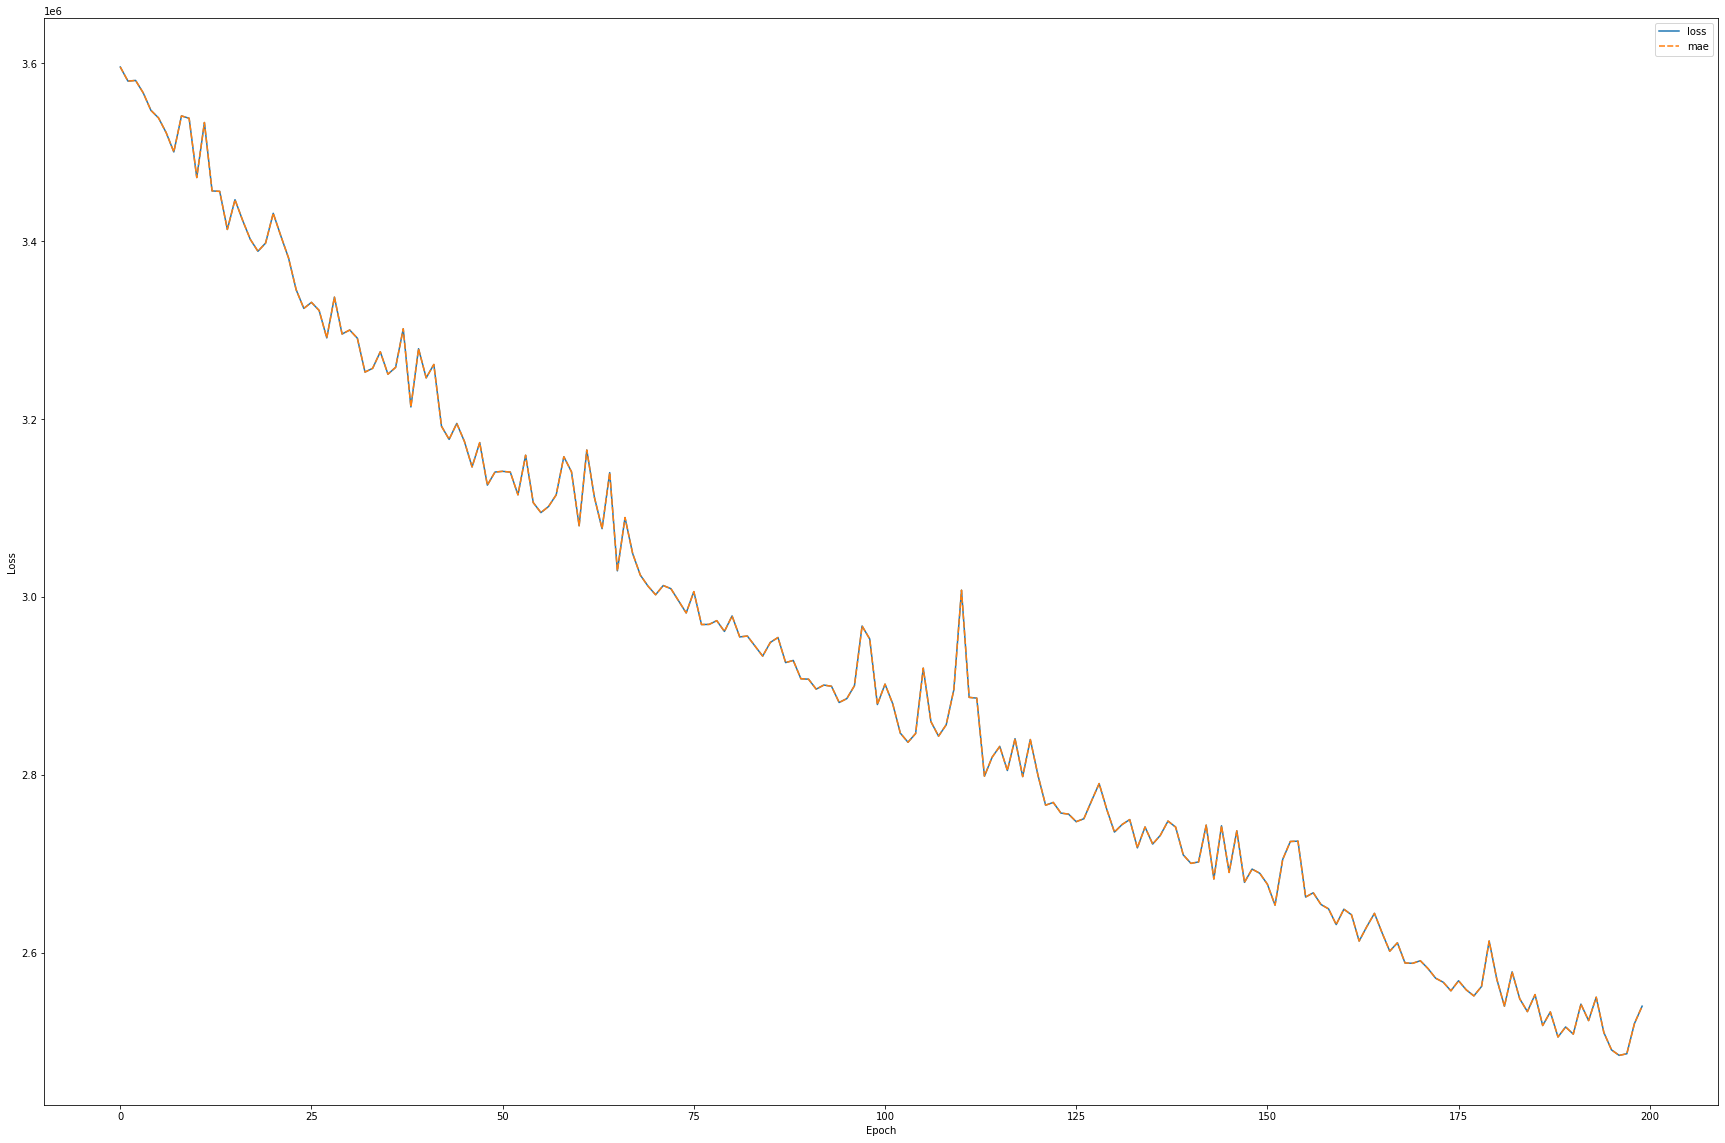

In [95]:
fit_data = nba_model.fit(X_train_normal, y_train, epochs=200, verbose=0)
nba_model_loss, nba_model_mae = nba_model.evaluate(X_test_normal, y_test)
plt.figure(figsize=(30, 20))
plt.ylabel("Loss")
plt.xlabel("Epoch")
sns.lineplot(data=fit_data.history, color='blue')

2/2 [==============================] - 0s 944us/step - loss: 6222405.5000 - mae: 6222405.5000


<AxesSubplot:xlabel='Epoch', ylabel='Loss'>

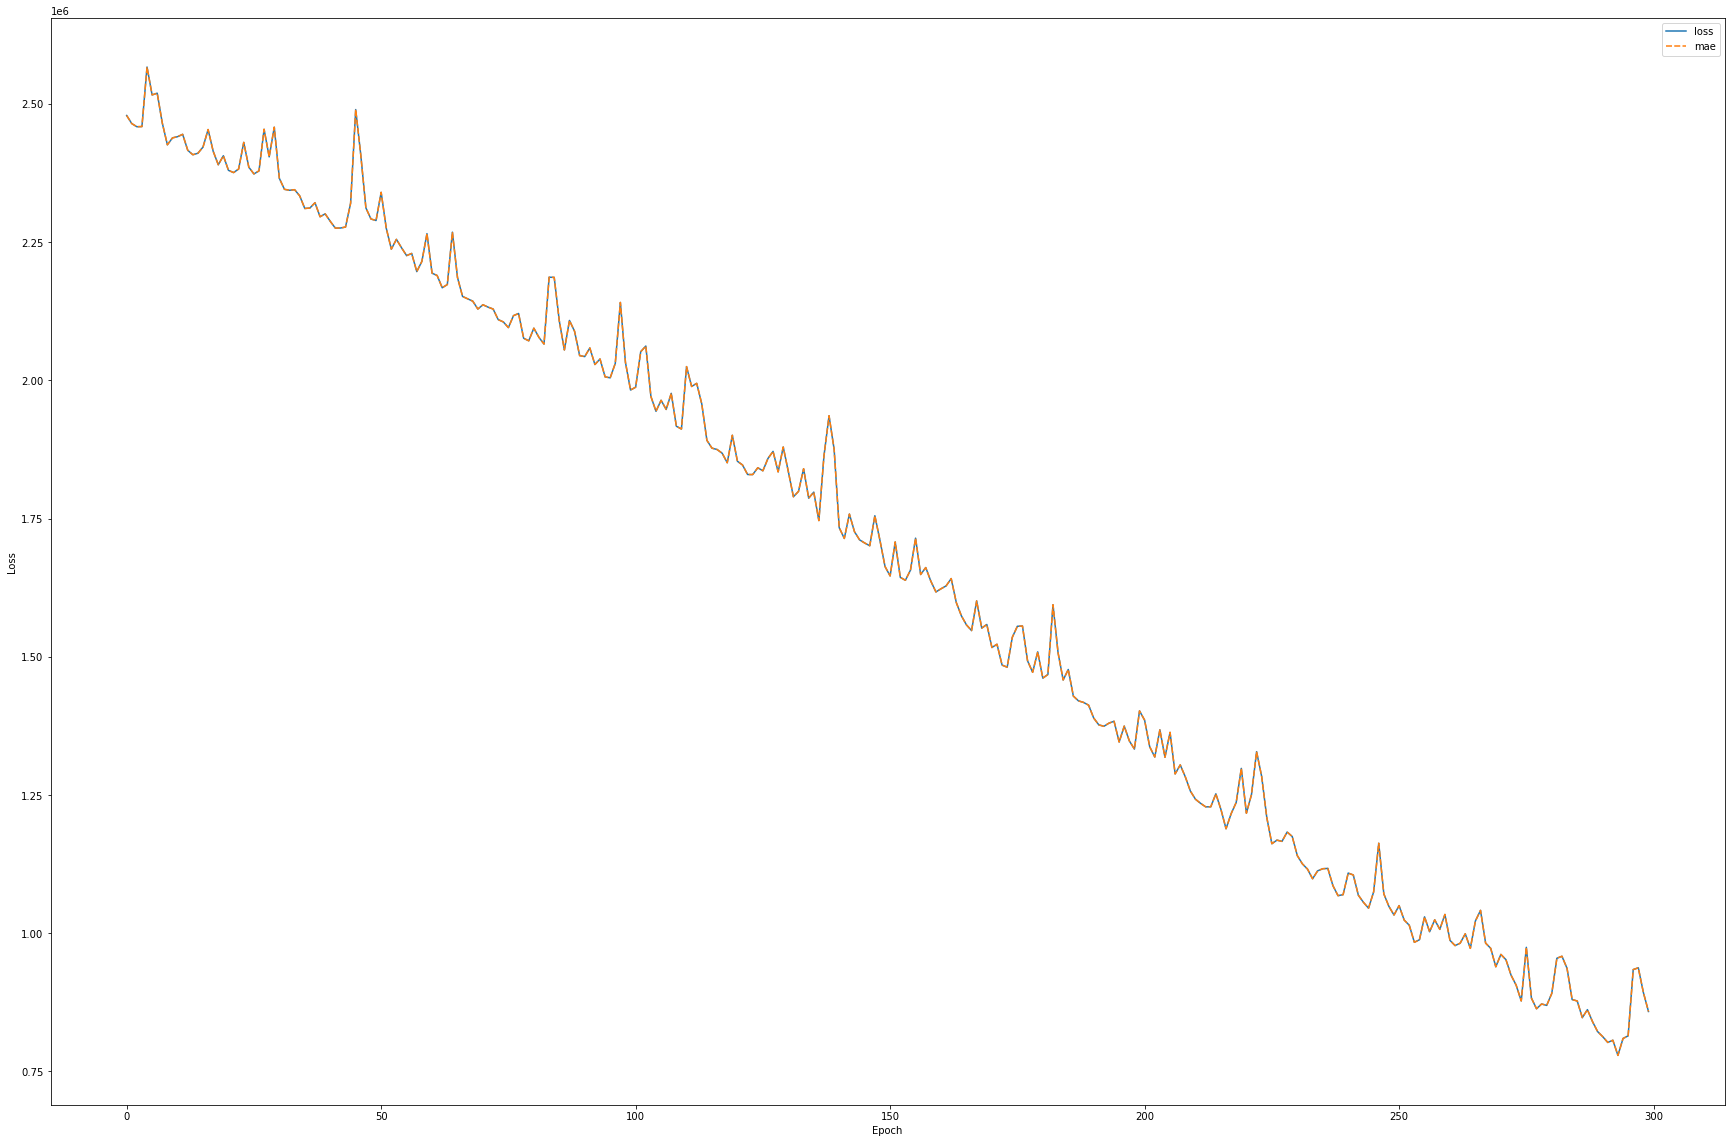

In [96]:
fit_data = nba_model.fit(X_train_normal, y_train, epochs=300, verbose=0)
nba_model_loss, nba_model_mae = nba_model.evaluate(X_test_normal, y_test)
plt.figure(figsize=(30, 20))
plt.ylabel("Loss")
plt.xlabel("Epoch")
sns.lineplot(data=fit_data.history, color='blue')

2/2 [==============================] - 0s 6ms/step - loss: 6451845.5000 - mae: 6451845.5000


<AxesSubplot:xlabel='Epoch', ylabel='Loss'>

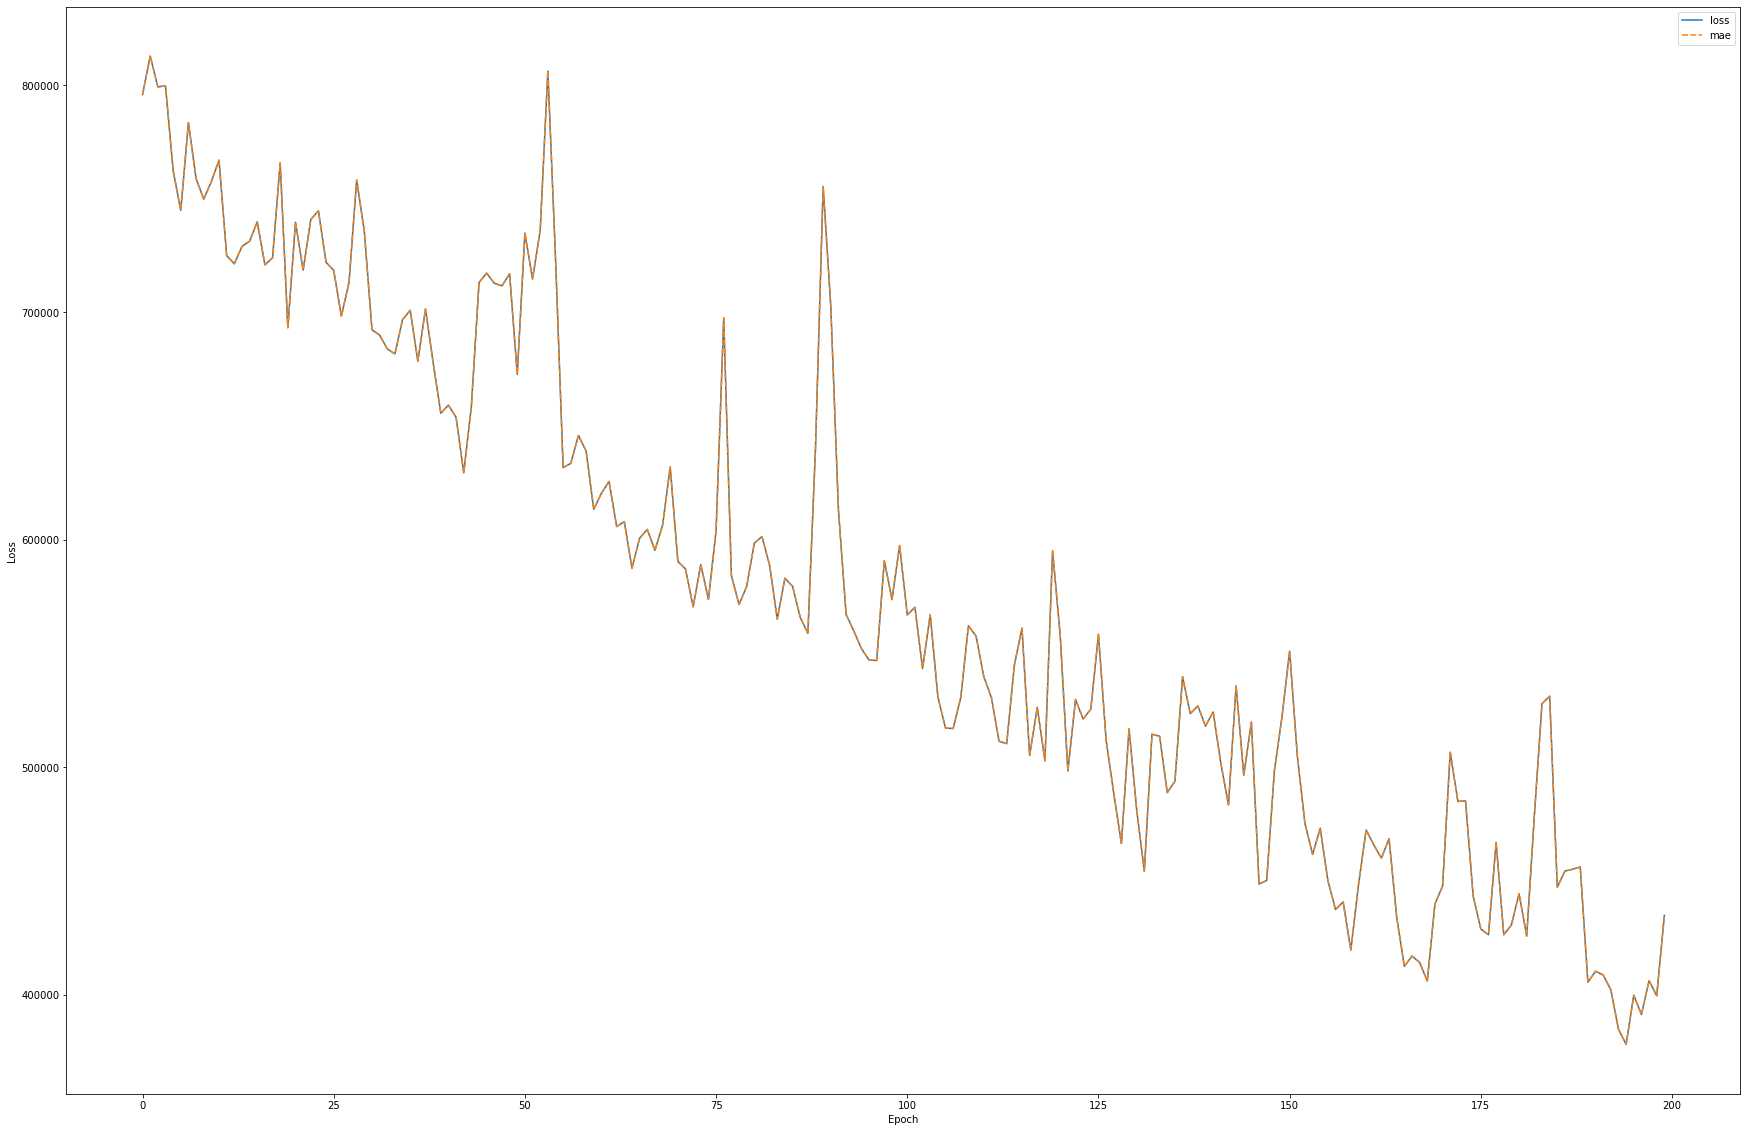

In [97]:
ct = make_column_transformer((MinMaxScaler(), ['fg', 'ft', 'fta', 'tov', 'pts']))

fit_data = nba_model.fit(X_train_normal, y_train, epochs=200, verbose=0)
nba_model_loss, nba_model_mae = nba_model.evaluate(X_test_normal, y_test)
plt.figure(figsize=(30, 20))
plt.ylabel("Loss")
plt.xlabel("Epoch")
sns.lineplot(data=fit_data.history, color='blue')